# *EX01. Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN*



In [51]:
import pandas as pd

In [52]:
df = pd.read_csv('preu lloguer per trimestre i barri.csv')

Cargamos los datos del archivo csv con el que vamos a trabajar en un dataframe.

# 1A. Resumeix-lo estadísticament

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


Exploramos los datos, comprobando como hay cuatro atributos de tipo object y no hay datos nulos (584 = 584).

In [54]:
df.shape

(584, 8)

Para un total de 584 filas y 8 columnas.

In [55]:
df.head(1)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2


El dataset refleja los precios de la vivienda de alquiler en Barcelona, en el año 2021 (any), clasificados por distritos (Codi_Districte i Nom_Districte), barrios (Codi_Barri i Nom_Barri), trimestres (Trimestre) y distinguiendo entre precios por metro cuadrado o precio por vivienda (Lloguer_mitja), lo que queda reflejado en el precio (Preu).

Nom_Districte, Nom-Barri y Lloguer_mitja contienen datos de tipo string, tipificados como object.

In [56]:
df.Preu.unique()[0]

'759.2'

Preu contiene también strings tipificados como object.

In [57]:
df['Preu'] = pd.to_numeric(df['Preu'], errors='coerce')

Convertimos los valores a flotantes. El parámetro 'coerce' hará que cualquier valor no convertible a float sea NaN.

Vamos ahora con la descripción de los datos, enfocándonos en la variable precio ...

In [58]:
df[df.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)']['Preu'] \
.groupby(df.Trimestre).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Trimestre,,,,,,,,
1,67.0,869.30,221.53,520.2,741.25,808.9,928.00,1598.2
2,68.0,851.91,211.95,447.5,733.65,812.8,911.42,1680.3
3,67.0,880.79,225.84,547.7,752.40,823.6,968.50,1816.5
4,68.0,884.47,228.63,546.8,750.05,826.7,958.25,1679.3


Observamos como el precio medio de la vivienda oscila entre el mínimo de 851€ para el segundo trimestre y un máximo de 884€ para el cuarto trimestre, con una desviación típica de entorno a los 220€. La mediana está entorno a 60€ por debajo de la media, lo que señala un sesgo positivo (hacia la derecha), es decir, las viviendas presentan mayor diferencia de precios en los rangos altos.

Si agrupamos por distritos en vez de por trimestres ...

In [59]:
df[df.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)']['Preu'] \
.groupby(df.Nom_Districte).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Nom_Districte,,,,,,,,
Ciutat Vella,16.0,858.92,70.78,759.2,800.22,870.00,924.50,968.4
Eixample,24.0,1000.55,105.24,887.1,922.80,964.95,1070.80,1220.8
Gràcia,20.0,877.26,65.81,745.4,859.18,895.65,921.80,961.0
Horta-Guinardó,40.0,765.01,61.54,653.5,726.45,756.30,817.82,884.2
Les Corts,12.0,1214.07,359.67,904.8,969.00,1007.90,1618.48,1816.5
Nou Barris,40.0,664.29,71.12,488.1,624.12,671.80,700.68,803.7
Sant Andreu,26.0,721.20,94.36,447.5,647.80,755.45,792.50,827.2
Sant Martí,40.0,916.45,178.81,700.5,795.35,869.20,976.98,1364.7
Sants-Montjuïc,28.0,798.93,38.95,691.9,778.32,805.25,818.35,872.5


... y por barrios ...

In [60]:
df[df.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)']['Preu'] \
.groupby(df.Nom_Barri).describe().round(2).sort_values(by=('mean'))[:4]

,count,mean,std,min,25%,50%,75%,max
Nom_Barri,,,,,,,,
Ciutat Meridiana,4.0,525.70,28.13,488.1,512.18,533.50,547.02,547.7
Baró de Viver,2.0,532.10,119.64,447.5,489.80,532.10,574.40,616.7
la Trinitat Nova,4.0,592.75,24.32,557.0,588.20,601.80,606.35,610.4
la Trinitat Vella,4.0,607.28,21.67,585.0,590.55,608.75,625.48,626.6


... en orden descendente ...

In [61]:
df[df.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)']['Preu'] \
.groupby(df.Nom_Barri).describe().round(2).sort_values(by=('mean'), ascending=False)[:4]

,count,mean,std,min,25%,50%,75%,max
Nom_Barri,,,,,,,,
Pedralbes,4.0,1693.58,90.53,1598.2,1659.02,1679.80,1714.35,1816.5
les Tres Torres,4.0,1542.72,76.88,1429.0,1532.12,1572.25,1582.85,1597.4
Sant Gervasi - Galvany,4.0,1355.05,57.92,1294.9,1328.05,1345.80,1372.80,1433.7
la Vila Olímpica del Poblenou,4.0,1313.82,51.39,1248.6,1286.32,1321.00,1348.50,1364.7


Vemos como Pedralbes es el barrio con un precio medio de alquiler por vivienda más alto, en 1816.15€, mientras de los disponibles Ciutat Meridiana sería el que tiene un precio más bajo, en 547.7€. Pero nos quedaría la duda de si se puede deber al tamaño de las viviendas ...

Vamos a ver el precio medio por metro cuadrado, mínimo y máximo:

In [62]:
df.Lloguer_mitja.unique()

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

Comprobamos la nomenclatura ...

In [63]:
df[df.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)']['Preu'] \
.groupby(df.Nom_Barri).describe().round(2).sort_values(by=('mean'))[:4]

,count,mean,std,min,25%,50%,75%,max
Nom_Barri,,,,,,,,
Baró de Viver,2.0,7.95,1.77,6.7,7.32,7.95,8.57,9.2
Ciutat Meridiana,4.0,8.90,0.55,8.1,8.78,9.10,9.22,9.3
Canyelles,4.0,9.32,0.53,8.7,9.15,9.30,9.48,10.0
la Guineueta,4.0,9.70,0.36,9.4,9.40,9.65,9.95,10.1


In [64]:
df[df.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)']['Preu'] \
.groupby(df.Nom_Barri).describe().round(2).sort_values(by=('mean'), ascending=False)[:4]

,count,mean,std,min,25%,50%,75%,max
Nom_Barri,,,,,,,,
la Vila Olímpica del Poblenou,4.0,16.73,0.67,16.1,16.18,16.75,17.30,17.3
la Barceloneta,4.0,16.02,0.41,15.5,15.80,16.10,16.32,16.4
Sarrià,4.0,15.90,0.22,15.6,15.82,15.95,16.02,16.1
Diagonal Mar i el Front Marítim del Poblenou,4.0,15.75,0.83,15.1,15.18,15.50,16.08,16.9


En este caso si nos encontramos con diferencias, especialmente en el rango alto de precios, siendo la Villa Olímpica el barrio con un precio medio de alquiler por metro cuadrado más alto ...

... pero vamos a buscar Pedralbes ...

In [65]:
df[(df.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)') &
 (df.Nom_Barri == 'Pedralbes')]['Preu'].describe()

count     4.000000
mean     15.025000
std       0.801561
min      14.000000
25%      14.600000
50%      15.150000
75%      15.575000
max      15.800000
Name: Preu, dtype: float64

Una posible interpretación de las diferencias la podemos encontrar en el tamaño de las viviendas, y como el precio medio tiende a disminuir cuanto mayor es el tamaño de la vivienda, lo que explica que por ejemplo Pedralbes no se encuentre en los primeros lugares en el precio por metro cuadrado y sí la Barceloneta.

Creamos una columna nueva `Index_Barri` que mide la relación del precio de la vivienda entre ese barrio y el conjunto de todos los barrios. Los valores por debajo de 1 indican que el precio está por debajo de la media.

Por último, vamos a comprobar que no hay datos duplicados:

In [66]:
df.duplicated().value_counts()

False    584
dtype: int64

No hay registros duplicados.

In [67]:
df['Preu'].isnull().value_counts()

False    540
True      44
Name: Preu, dtype: int64

y sí tenemos 44 registros de precios nulos ...

In [68]:
df[df['Preu'].isnull()].groupby('Nom_Barri').size()

Nom_Barri
Baró de Viver                 4
Can Peguera                   8
Torre Baró                    8
Vallbona                      8
la Clota                      8
la Marina del Prat Vermell    8
dtype: int64

Todos los precios para Baró de Viver ... la Marina del Prat Vermell; y la mitad para `Baró de Viver` ...

In [69]:
df[df.Nom_Barri == 'Baró de Viver'][['Trimestre', 'Lloguer_mitja', 'Preu']].groupby('Trimestre').value_counts()

Trimestre  Lloguer_mitja                                Preu 
2          Lloguer mitjà mensual (Euros/mes)            447.5    1
           Lloguer mitjà per superfície (Euros/m2 mes)  6.7      1
4          Lloguer mitjà mensual (Euros/mes)            616.7    1
           Lloguer mitjà per superfície (Euros/m2 mes)  9.2      1
dtype: int64

... que solamente tiene datos para el segundo y cuarto trimestres.

Hasta aquí las descripciones teórica y estadística de los datos. Primero hemos detallado las características disponibles, hemos comprobado el tipo de las variables, convertido Preu en una variable numérica y a partir de aquí nos hemos centrado en esta variable, obteniendo distintos parámetros de centralización y dispersión, agrupando por trimestres, distritos y barrios. Hemos comprobado también las diferencias entre reflejar los precios por vivienda o por metro cuadrado. Más allá se han ordenado los datos según las respectivas medias. Finalmente se han descartado la existencia de duplicidades y comprobado para qué barrios no tenemos registros, deteniéndonos en `Baró de Viver` como caso particular, lo cuál tiene también su importancia, pues de alguna manera no quedan reflejados en las estadísticas previas.  
Destacar las desviaciones típicas de entorno al 25% de las medias de precios, lo que indica la variabilidad, así como el hecho de estar sesgadas las medias hacia la derecha de las medianas, con un nivel de dispersión mayor para precios altos.

# 1B. Resumeix-lo gràficament

A. Una variable categòrica (Districte o Barri)

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [22]:
!pip install squarify

In [23]:
import squarify

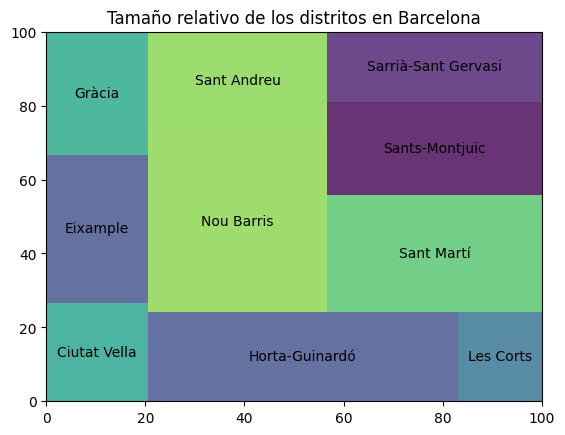

In [24]:
y = df.groupby('Nom_Districte').size()
plt.title("Tamaño relativo de los distritos en Barcelona")
squarify.plot(sizes=y, label=y.index, alpha=.8)
plt.savefig('area_districtes')
plt.show()

Tamaño relativo de los distritos en función del número de barrios.

B. Una variable numèrica (Preu)

In [25]:
import seaborn as sns

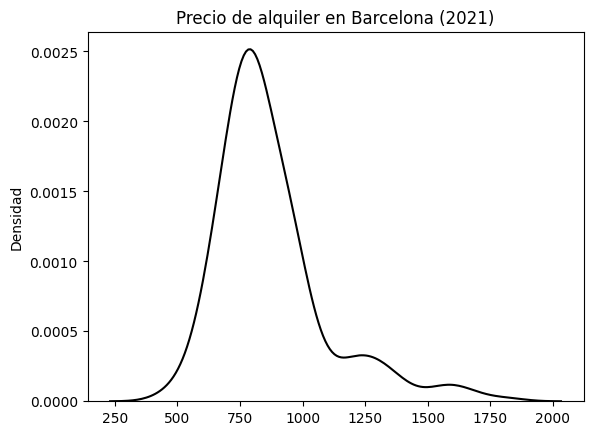

In [26]:
preus = df[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']['Preu']

plt.title("Precio de alquiler en Barcelona (2021)")
plt.ylabel("Densidad")
sns.kdeplot(preus.values, color = 'black')
plt.savefig('distribucion_precios_vivienda')

Representamos la distribución de precios mensuales por vivienda de forma suavizada, utilizando un gráfico de densidad de Kernel, para tener una idea bastante aproximada de los precios de alquiler por vivienda en Barcelona en 2021.

C. Una variable numèrica i una categòrica (Districte i Preu)

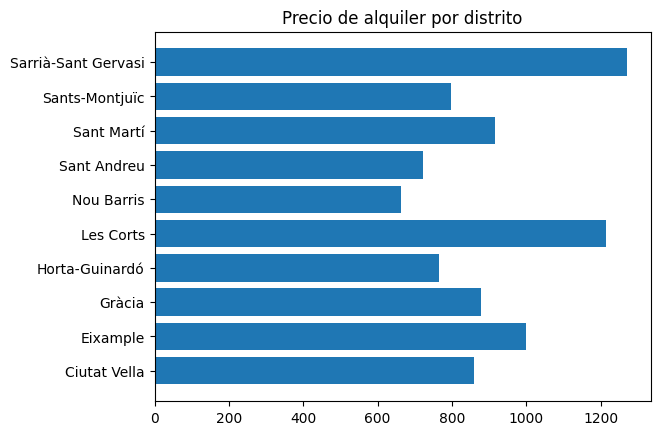

In [27]:
preus = df[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'].groupby('Nom_Districte')['Preu'].mean()

x = preus.index
y = preus.values

plt.barh(x,y)
plt.title("Precio de alquiler por distrito")
plt.savefig('preu_vivenda_districte')
plt.show()

Representamos los precios medios de alquiler por vivienda (numérica) por distrito (categórica), para todo el año.

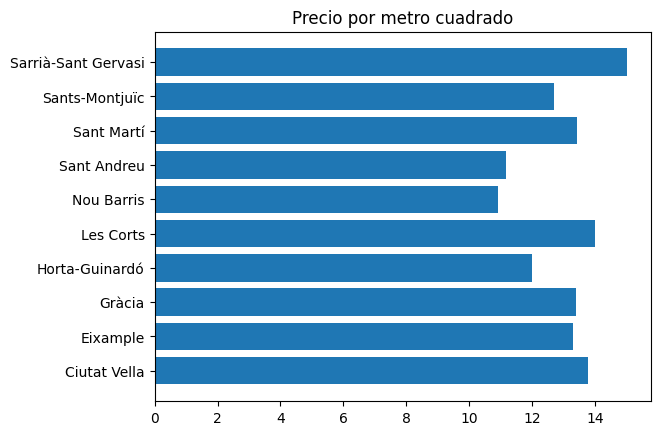

In [33]:
preus = df[df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)'].groupby('Nom_Districte')['Preu'].mean()

x = preus.index
y = preus.values

plt.barh(x, y)
plt.title("Precio por metro cuadrado")
plt.savefig('preu_metre_districte')
plt.show()

Y los precios medios de alquiler por metro cuadrado por distrito.

D. Dues variables numèriques (Any o Trimestre i Preu)

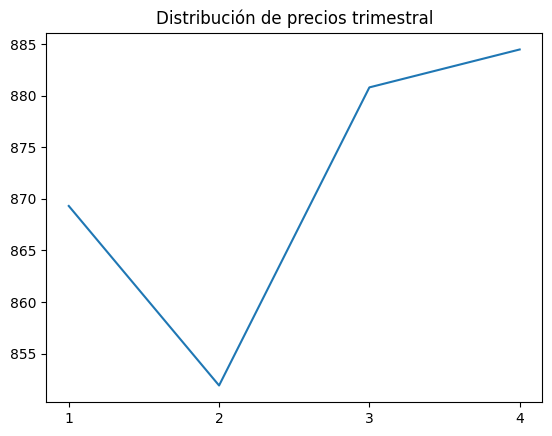

In [116]:
preus_trimestre = df[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'].groupby('Trimestre')['Preu'].mean()

plt.title("Distribución de precios trimestral")
plt.xticks(range(4), range(1,5))
plt.plot(preus_trimestre.values)
plt.savefig('distribucion_trimestres')

En este caso vemos la evolución trimestral del precio medio de alquiler por vivienda durante el año 2021 en Barcelona. Observamos una caída de entorno a 20€ del primer al segundo trimestre, para un posterior ascenso hasta final de unos 35€, situándose el máximo entorno a los 885€.

E. Tres variables (Barri o Districte, Trimestre i Preu)

In [35]:
import numpy as np

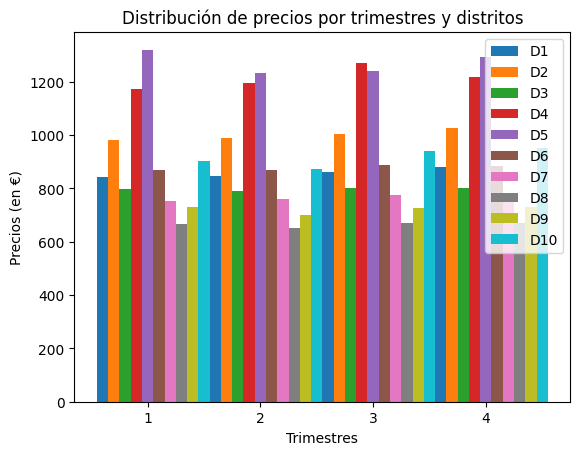

In [36]:
d = {}
bar = {}
bars = []
districtes = []

for i in range(1, 11):
  d[str(i)] = df[(df['Codi_Districte'] == i) & (df['Lloguer_mitja'] ==
                                 'Lloguer mitjà mensual (Euros/mes)')].groupby(['Trimestre'])['Preu'].mean().round(1).values

for n in range(1, 11):
  bar[str(n)] = plt.bar(np.arange(1, 5) + 0.1*(0+n), d[str(n)], 0.1)
  bars.append(bar[str(n)])
  districtes.append('D'+str(n))

plt.xticks(np.arange(1, 5) + 0.5, ['1', '2', '3', '4'])
plt.title("Distribución de precios por trimestres y distritos")
plt.xlabel("Trimestres")
plt.ylabel("Precios (en €)")
plt.legend(bars, districtes)
plt.savefig('preu_trimestre_districte')
plt.show()

Representamos el precio de alquiler medio por vivienda para los 10 distritos, clasificados por código y agrupados por trimestres. Centrándonos en los máximos destacan los distritos 4 y 5, en el mínimo tenemos a los distritos 8 y 9. La evolución durante el año la vemos de forma más clara en el gráfico anterior, y la distribución de precios en los dos gráficos de abajo.

# EX03. Proposa alguna visualització que creguis que pot resultar interessant.


Otra manera de visualizar la distribucion de precios es entorno a un índice medio de 1. En este caso veremos la distribución por distritos y precio medio del alquiler por vivienda y por metro cuadrado.

In [80]:
# Índice del precio de la vivienda según el barrio

precio_medio_vivienda = df[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']['Preu'].mean()
precio_medio_metro = df[df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']['Preu'].mean()

x = 1
y = 1

while(x < 74):
  indice_metro = round((df[(df['Codi_Barri'] == x) & (df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)')]['Preu'].mean())/precio_medio_metro, 2)
  df.loc[(df['Codi_Barri'] == x) & (df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)'), 'Index_Districte_Metre'] = indice_metro
  x += 1

while(y < 74):
  indice_vivienda = round((df[(df['Codi_Barri'] == y) & (df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)')]['Preu'].mean())/precio_medio_vivienda, 2)
  df.loc[(df['Codi_Barri'] == y) & (df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'), 'Index_Districte_Vivenda'] = indice_vivienda
  y += 1

Creamos un índice de precios sobre la media de precios por vivienda y por metro cuadrado para cada distrito, y lo asignamos a dos nuevas columnas: 'Index_Districte_Vivenda' e 'Index_Districte_Metre'

In [98]:
n = 1
districtes = []
for i in df.groupby('Nom_Districte').groups.keys():
  districtes.append(i)
  n+=1

Guardamos el nombre de los distritos en una lista, que nos servirá para etiquetar el eje x.

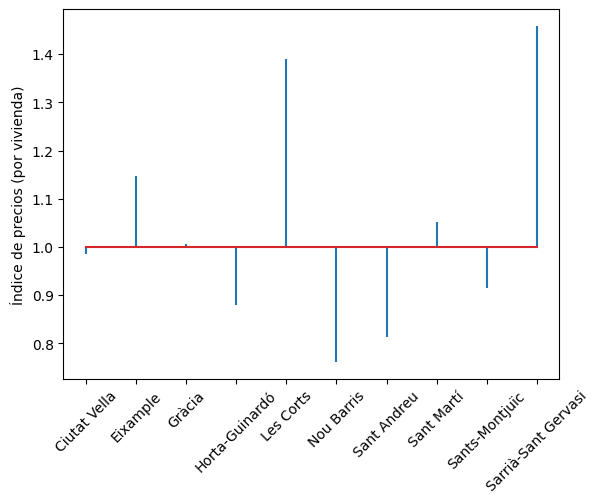

In [108]:
plt.stem(df.groupby('Nom_Districte')['Index_Districte_Vivenda'].mean(), markerfmt=' ', bottom=1)
plt.ylabel('Índice de precios (por vivienda)')
plt.xticks(range(10), districtes, rotation = 45)
plt.show()

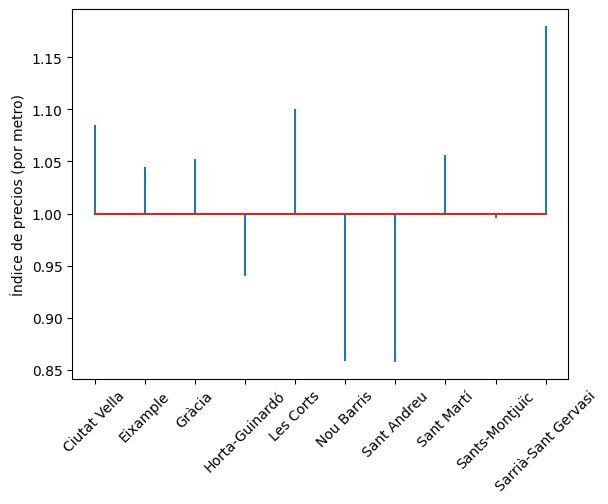

In [109]:
plt.stem(df.groupby('Nom_Districte')['Index_Districte_Metre'].mean(), markerfmt=' ', bottom=1)
plt.ylabel('Índice de precios (por metro)')
plt.xticks(range(10), districtes, rotation = 45)
plt.show()

Observamos como las distribuciones son parecidas, pero las distancias son mayores cuando evaluamos el precio total de las viviendas, lo cual se explica por el mayor o menor tamaño de las mismas según el distrito, lo que las acentúa, algo que ya veíamos al hacer la descripción estadística.

Finalmente, en este caso el estudio realizado se ha centrado en reflejar utilizando distintas herramientas gráficas y estadísticas la distribución de precios de alquiler de la vivienda en Barcelona en el año 2021, diferenciando entre distritos, trimestres e incluso barrios, lo que nos da una idea bastante aproximada de la situación real. Se ha evitado en todo caso hacer valoraciones de carácter subjetivo, limitándonos a reflejar los datos de la manera más objetiva posible y buscando utilizar distintas herramientas gráficas adecuadas, utilizando dos librerías distintas y a modo de exploración incluyendo también la biblioteca squarify de python.